# Estimate different of inter-pizza shop distance distribution between NewYork and Toronto.

## Introduction

Inter-pizza shop distance is important factor for pizza shop. In perspective of owner of pizzashop, lower value of mean inter-pizza shop distance can be reduce the profit of pizza shop. However, in customer's perspective, lower value could increase the temperature of pizza. Therefore, getting distribution of inter-pizza distance distribution is important. In this project, we will get this distribution and comparing it between NewYork and Toronto.

## Data explain

Our goal is to get histogram of inter-pizza shop distance at NewYork and Toronto and comparing it.
To get histogram, first, get pivot places of each cities. Second, by using foursquare api, get pizza shop of all searchable places. Last, calculate distance and draw histogram.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### 1. Geolocation data 

Get geolocation data from internet.
First, NewYork.

In [2]:
# !wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
newyork_neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_neighborhoods = newyork_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
newyork_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111
302,Queens,Hammels,40.587338,-73.805530
303,Queens,Bayswater,40.611322,-73.765968
304,Queens,Queensbridge,40.756091,-73.945631


In [18]:
newyork_neighborhoods["Borough"].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

Now, Toronto.

In [7]:
toronto_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
toronto_data = toronto_data[toronto_data["Borough"] != "Not assigned"]
toronto_data

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [8]:
toronto_postal = pd.read_csv("Geospatial_data.csv")
toronto_postal

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [9]:
toronto_neighborhoods = pd.merge(toronto_data, toronto_postal, on="Postal Code")
toronto_neighborhoods

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [13]:
newyork_map = folium.Map(location=[newyork_neighborhoods["Latitude"].mean(), 
                                   newyork_neighborhoods["Longitude"].mean()], zoom_start=10)
for code, lat, lon in zip(newyork_neighborhoods["Neighborhood"], 
                          newyork_neighborhoods["Latitude"], 
                          newyork_neighborhoods["Longitude"]):
    folium.CircleMarker([lat, lon], radius=3, popup = code).add_to(newyork_map)
newyork_map

To reduce data, we will only use Manhattan and Brooklyn.

In [21]:
manhattan_neighborhoods = newyork_neighborhoods.loc[newyork_neighborhoods["Borough"]=="Manhattan", :]
manhattan_neighborhoods.reset_index(drop=True, inplace=True)
manhattan_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [22]:
brooklyn_neighborhoods = newyork_neighborhoods.loc[newyork_neighborhoods["Borough"]=="Brooklyn", :]
brooklyn_neighborhoods.reset_index(drop=True, inplace=True)
brooklyn_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
...,...,...,...,...
65,Brooklyn,Dumbo,40.703176,-73.988753
66,Brooklyn,Homecrest,40.598525,-73.959185
67,Brooklyn,Highland Park,40.681999,-73.890346
68,Brooklyn,Madison,40.609378,-73.948415


In [17]:
toronto_map = folium.Map(location=[toronto_neighborhoods["Latitude"].mean(), 
                                   toronto_neighborhoods["Longitude"].mean()], zoom_start=11)
for code, lat, lon in zip(toronto_neighborhoods["Borough"], 
                          toronto_neighborhoods["Latitude"], 
                          toronto_neighborhoods["Longitude"]):
    folium.CircleMarker([lat, lon], radius=3, popup = code).add_to(toronto_map)
toronto_map

### 2. Make pizza shop list

In [10]:
from my_info import CLIENT_ID, CLIENT_SECRET, VERSION
LIMIT = 100

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
manhattan_nearby_venues = getNearbyVenues(names=manhattan_neighborhoods['Neighborhood'],
                                   latitudes=manhattan_neighborhoods['Latitude'],
                                   longitudes=manhattan_neighborhoods['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [32]:
manhattan_nearby_venues.to_csv("manhattan.csv")
manhattan_nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.910660,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.910660,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.910660,Dunkin',40.877136,-73.906666,Donut Shop
...,...,...,...,...,...,...,...
3146,Hudson Yards,40.756658,-74.000111,Cachet Boutique Hotel,40.759773,-73.996460,Hotel
3147,Hudson Yards,40.756658,-74.000111,StarDust,40.759869,-73.996460,Nightclub
3148,Hudson Yards,40.756658,-74.000111,Jake's,40.757954,-74.002296,American Restaurant
3149,Hudson Yards,40.756658,-74.000111,Gray Line New York Sightseeing Cruises - Pier 78,40.759721,-74.003982,Harbor / Marina


In [28]:
brooklyn_nearby_venues = getNearbyVenues(names=brooklyn_neighborhoods['Neighborhood'],
                                   latitudes=brooklyn_neighborhoods['Latitude'],
                                   longitudes=brooklyn_neighborhoods['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [33]:
brooklyn_nearby_venues.to_csv("brooklyn.csv")
brooklyn_nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place
...,...,...,...,...,...,...,...
2731,Erasmus,40.646926,-73.948177,Katherin's Kettle Korn,40.645851,-73.946226,Food Truck
2732,Erasmus,40.646926,-73.948177,NSA Food Market,40.646610,-73.945609,Grocery Store
2733,Erasmus,40.646926,-73.948177,Met Food,40.647400,-73.943565,Supermarket
2734,Erasmus,40.646926,-73.948177,Ambrosia Health Foods,40.650760,-73.946333,Health Food Store


In [34]:
toronto_nearby_venues = getNearbyVenues(names=toronto_neighborhoods['Neighborhood'],
                                   latitudes=toronto_neighborhoods['Latitude'],
                                   longitudes=toronto_neighborhoods['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [35]:
toronto_nearby_venues.to_csv("toronto.csv")
toronto_nearby_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
2103,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,7-Eleven,43.629107,-79.517431,Convenience Store
2104,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
2105,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,RONA,43.629393,-79.518320,Hardware Store
2106,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon


### 3. Get inter-pizza shop distance

To get pizza shop distance, we will extract pizzashop from data

In [41]:
pizza_index = manhattan_nearby_venues["Venue Category"].map(lambda x: "pizza" in x.lower() )
manhattan_pizza = manhattan_nearby_venues.loc[pizza_index, :]
manhattan_pizza.reset_index(drop=True, inplace=True)
manhattan_pizza

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Arturo's,40.874412,-73.910271,Pizza Place
1,Chinatown,40.715618,-73.994279,Scarr's Pizza,40.715335,-73.991649,Pizza Place
2,Washington Heights,40.851903,-73.936900,Fresco's Pizzeria,40.855202,-73.937216,Pizza Place
3,Inwood,40.867684,-73.921210,Grandpa's Brick Oven Pizza,40.868215,-73.919419,Pizza Place
4,Inwood,40.867684,-73.921210,Domino's Pizza,40.866316,-73.925624,Pizza Place
...,...,...,...,...,...,...,...
68,Sutton Place,40.760280,-73.963556,Brooklyn Pizza Masters,40.758647,-73.963041,Pizza Place
69,Sutton Place,40.760280,-73.963556,Sofia Pizza Shoppe,40.756591,-73.964412,Pizza Place
70,Tudor City,40.746917,-73.971219,Garlic New York Pizza Bar,40.745068,-73.975666,Pizza Place
71,Tudor City,40.746917,-73.971219,Libretto's Pizzeria,40.747196,-73.977089,Pizza Place


In [42]:
pizza_index = brooklyn_nearby_venues["Venue Category"].map(lambda x: "pizza" in x.lower() )
brooklyn_pizza = brooklyn_nearby_venues.loc[pizza_index, :]
brooklyn_pizza.reset_index(drop=True, inplace=True)
brooklyn_pizza

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
1,Bay Ridge,40.625801,-74.030621,Nonno's Pizza,40.621650,-74.031854,Pizza Place
2,Bay Ridge,40.625801,-74.030621,Peppino's,40.629851,-74.028481,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Ben's Pizzeria,40.626404,-74.029752,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Pizza Wagon,40.627059,-74.033917,Pizza Place
...,...,...,...,...,...,...,...
130,Homecrest,40.598525,-73.959185,Prince of Pizza,40.598438,-73.960958,Pizza Place
131,Homecrest,40.598525,-73.959185,Luigi's Pizzeria,40.599067,-73.954869,Pizza Place
132,Highland Park,40.681999,-73.890346,Little Caesars Pizza,40.678476,-73.888577,Pizza Place
133,Highland Park,40.681999,-73.890346,Regina's Pizzeria,40.679825,-73.885750,Pizza Place


In [43]:
pizza_index = toronto_nearby_venues["Venue Category"].map(lambda x: "pizza" in x.lower() )
toronto_pizza = toronto_nearby_venues.loc[pizza_index, :]
toronto_pizza.reset_index(drop=True, inplace=True)
toronto_pizza

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
1,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Pizza Pizza,43.705159,-79.313130,Pizza Place
2,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Venice Pizza,43.705921,-79.313957,Pizza Place
3,"Garden District, Ryerson",43.657162,-79.378937,Blaze Pizza,43.656518,-79.380015,Pizza Place
4,"Garden District, Ryerson",43.657162,-79.378937,Panago,43.658258,-79.384313,Pizza Place
5,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,Pizza Hut,43.641845,-79.576556,Pizza Place
6,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,Pizza Pizza,43.755311,-79.441126,Pizza Place
7,Thorncliffe Park,43.705369,-79.349372,Pizza Pizza,43.705564,-79.347139,Pizza Place
8,"Richmond, Adelaide, King",43.650571,-79.384568,Pizzeria Libretto,43.648334,-79.385111,Pizza Place
9,"Richmond, Adelaide, King",43.650571,-79.384568,Pi Co.,43.648651,-79.385874,Pizza Place


In [45]:
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 
      

Now, calculating distances. Averaging totoal distance is propotional to area. To prevent this, we will use lowest 5 distance for each pizza shop

In [74]:
def pizza_distance(df, top=5):
    pizza_distance = []
    for i in range(len(df)-1):
        tmp = []
        for j in range(i+1, len(df)):
            lat1, lon1 = df.loc[i, ["Venue Latitude", "Venue Longitude"]]
            lat2, lon2 = df.loc[j, ["Venue Latitude", "Venue Longitude"]]
            dist = distance(lat1, lat2, lon1, lon2)
            tmp.append(dist)
        tmp.sort(reverse = True)
        pizza_distance += tmp[:top]
    return pizza_distance

In [80]:
manhattan_pizza_distance = pizza_distance(manhattan_pizza)
manhattan_avg = sum(manhattan_pizza_distance)/len(manhattan_pizza_distance)
print(f"Average pizza distance: {manhattan_avg}Km")

Average pizza distance: 8.492624538652365Km


In [81]:
brooklyn_pizza_distance = pizza_distance(brooklyn_pizza)
brooklyn_avg = sum(brooklyn_pizza_distance)/len(brooklyn_pizza_distance)
print(f"Average pizza distance: {brooklyn_avg}Km")

Average pizza distance: 11.634234226436188Km


In [82]:
toronto_pizza_distance = pizza_distance(toronto_pizza)
toronto_avg = sum(toronto_pizza_distance)/len(toronto_pizza_distance)
print(f"Average pizza distance: {toronto_avg}Km")

Average pizza distance: 17.391576242886085Km


In [99]:
import matplotlib.pyplot as plt
from statistics import median, stdev

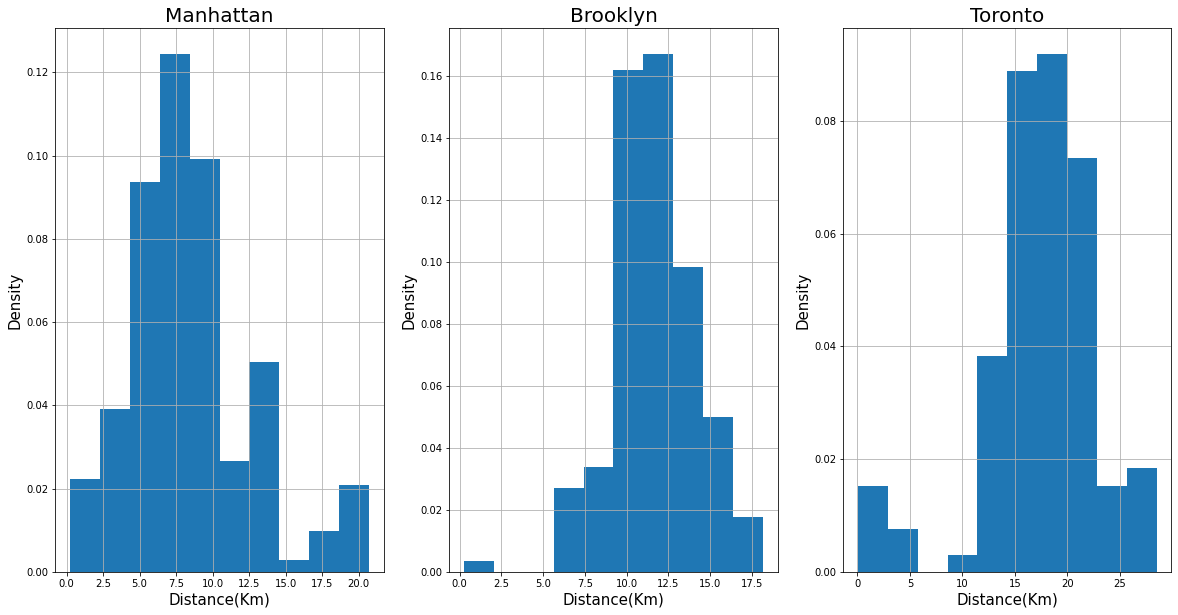

In [100]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax1.hist(manhattan_pizza_distance, density=True)
ax1.set_title("Manhattan", fontsize=20)
ax1.set_xlabel("Distance(Km)", fontsize=15)
ax1.set_ylabel("Density", fontsize=15)
ax1.grid()

ax2 = fig.add_subplot(132)
ax2.hist(brooklyn_pizza_distance, density=True)
ax2.set_title("Brooklyn", fontsize=20)
ax2.set_xlabel("Distance(Km)", fontsize=15)
ax2.set_ylabel("Density", fontsize=15)
ax2.grid()

ax3 = fig.add_subplot(133)
ax3.hist(toronto_pizza_distance, density=True)
ax3.set_title("Toronto", fontsize=20)
ax3.set_xlabel("Distance(Km)", fontsize=15)
ax3.set_ylabel("Density", fontsize=15)
ax3.grid()

In [101]:
result_index = ["Manhattan", "Brooklyn", "Toronto"]
mean = [
    manhattan_avg,
    brooklyn_avg,
    toronto_avg
]
median = [
    median(manhattan_pizza_distance),
    median(brooklyn_pizza_distance),
    median(toronto_pizza_distance),
]
max_ = [
    max(manhattan_pizza_distance),
    max(brooklyn_pizza_distance),
    max(toronto_pizza_distance),
]
min_ = [
    min(manhattan_pizza_distance),
    min(brooklyn_pizza_distance),
    min(toronto_pizza_distance),
]
std = [
    stdev(manhattan_pizza_distance),
    stdev(brooklyn_pizza_distance),
    stdev(toronto_pizza_distance),   
]

result = pd.DataFrame(index=result_index, data={
    "Mean": mean,
    "Median": median,
    "Max": max_,
    "Min": min_,
    "Std dev": std
})
result

,Mean,Median,Max,Min,Std dev
Manhattan,8.492625,7.908357,20.697896,0.256126,4.170883
Brooklyn,11.634234,11.620071,18.140919,0.281662,2.496553
Toronto,17.391576,17.549613,28.474659,0.070850,5.338508


## Conclusion
Manhattan and Brooklyn has significantly low distance mean, median, max, min than Toronto.
By this result, we can know that Newyork(Manhattan, Brooklyn) has more great pizza infrastructure than Toronto.